___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Load stock data
At first we load the csv files containing the stock prices of apple, amazon, general electric and the CBOE Volatility Index since 1-1-2010

In [13]:
aapl = pd.read_csv("apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("VIX_2010.csv",index_col='Date',parse_dates=True)
sp500 = pd.read_csv("sp500_2010.csv",index_col='Date',parse_dates=True)

In [14]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700


## Compute cumulative returns
The cumulative return is the overall total return of an investment over a given time period.
You can compute it by subtracting the current price of a stock from the price it had when you bought it.<br />
To compute the percentage value, you divide it instead of subtracting

In [15]:
ge["Adj Close"]

Date
2009-12-31     86.062485
2010-01-04     87.882713
2010-01-05     88.337753
2010-01-06     87.882713
2010-01-07     92.433258
                 ...    
2021-08-30    105.190002
2021-08-31    105.410004
2021-09-01    103.660004
2021-09-02    106.260002
2021-09-03    104.750000
Name: Adj Close, Length: 2940, dtype: float64

In [16]:
def compute_cumulative(data, get_absolute=True):
    initial_price = data["Adj Close"].iloc[0]
    last_price = data["Adj Close"].iloc[-1]
    if get_absolute:
        # Returns absolute dollar gain for 1 share
        return last_price - initial_price
    else:
        # Returns percentage change
        return 100*(last_price-initial_price) / initial_price   #last_price/initial_price
        

In [17]:
aapl_absolute_cumulative_return = compute_cumulative(aapl)
aapl_percentage_cumulative_return = compute_cumulative(aapl, False) 

amzn_absolute_cumulative_return = compute_cumulative(amzn)
amzn_percentage_cumulative_return = compute_cumulative(amzn, False) 

ge_absolute_cumulative_return = compute_cumulative(ge)
ge_percentage_cumulative_return = compute_cumulative(ge, False)  

sp500_absolute_cumulative_return = compute_cumulative(sp500)
sp500_percentage_cumulative_return = compute_cumulative(sp500, False)  


print(f"Apple cumulative return: {aapl_absolute_cumulative_return}; Percentage: {aapl_percentage_cumulative_return}%")
print(f"Amazon cumulative return: {amzn_absolute_cumulative_return}; Percentage: {amzn_percentage_cumulative_return}%")
print(f"GE cumulative return: {ge_absolute_cumulative_return}; Percentage: {ge_percentage_cumulative_return}%")
print(f"SP500 cumulative return: {sp500_absolute_cumulative_return}; Percentage: {sp500_percentage_cumulative_return}%")

Apple cumulative return: 147.8379945755005; Percentage: 2287.802548057404%
Amazon cumulative return: 3343.530044555664; Percentage: 2485.5262699691684%
GE cumulative return: 18.687515258789062; Percentage: 21.713892313221308%
SP500 cumulative return: 364.0951385498047; Percentage: 409.16532043511756%


## Visualized Cummulative Returns Over Time

### Absolute Returns (a.k.a How many dollars earned per share if held since start of time series?)
We can also plot the cumulative returns over time by  subtracting) all prices from the initial one

**IMPORTANT NOTE: This doesn't tell you the initial price of a share, so a \\$100 gain per share is great if you bought each share at \\$5 but not as great if each share cost you \\$10000!**

In [18]:
aapl["Cumulative_Absolute"] = aapl["Adj Close"] - aapl["Adj Close"].iloc[0]
amzn["Cumulative_Absolute"] = amzn["Adj Close"] - amzn["Adj Close"].iloc[0]
ge["Cumulative_Absolute"] = ge["Adj Close"] - ge["Adj Close"].iloc[0]
sp500["Cumulative_Absolute"] = sp500["Adj Close"] - sp500["Adj Close"].iloc[0]

Text(0, 0.5, 'Absolute Dollar Gain per Share')

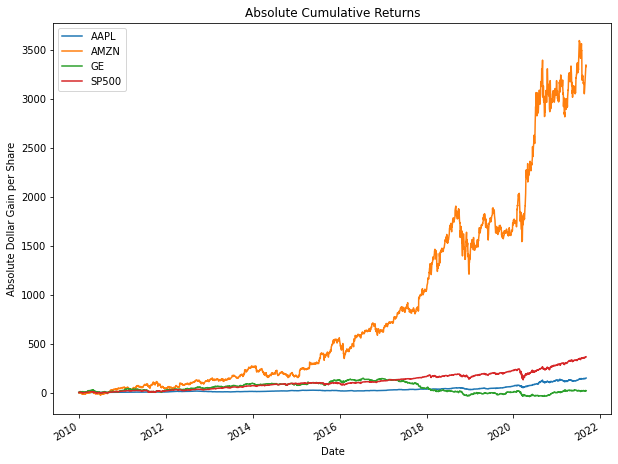

In [19]:
aapl["Cumulative_Absolute"].plot(label="AAPL", figsize=(10, 8))
amzn["Cumulative_Absolute"].plot(label="AMZN")
ge["Cumulative_Absolute"].plot(label="GE")
sp500["Cumulative_Absolute"].plot(label="SP500")

plt.legend()
plt.title("Absolute Cumulative Returns")
plt.ylabel("Absolute Dollar Gain per Share")

Note how this plot is really not that informative since it never informed us of the initial price per share! This is why we begin to think about "normalizing" our gains. We need a way to fairly compare performance between individual stocks, like percentage gain!

In [20]:
aapl["Cumulative_Percentage"] = 100* (aapl["Adj Close"]-aapl["Adj Close"].iloc[0]) / aapl["Adj Close"].iloc[0]
amzn["Cumulative_Percentage"] = 100* (amzn["Adj Close"]-amzn["Adj Close"].iloc[0]) / amzn["Adj Close"].iloc[0]
ge["Cumulative_Percentage"] = 100* (ge["Adj Close"]-ge["Adj Close"].iloc[0]) / ge["Adj Close"].iloc[0]
sp500["Cumulative_Percentage"] = 100* (sp500["Adj Close"]-sp500["Adj Close"].iloc[0]) / sp500["Adj Close"].iloc[0]

You can see that comparing absolute cumulative returns is not ideal because of different scalings, thus we should use the percentage values:

Text(0.5, 1.0, 'Percent Cumulative Returns')

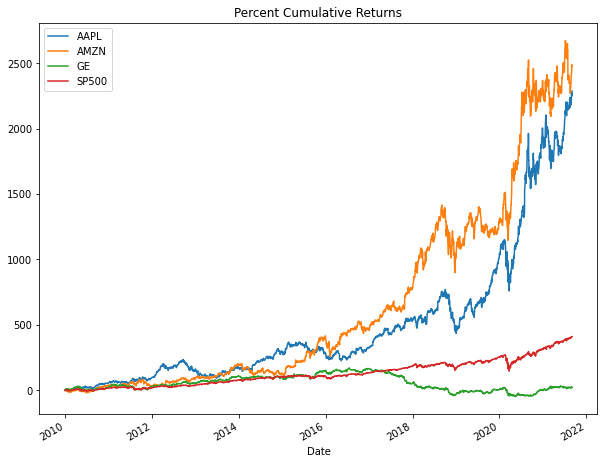

In [21]:
aapl["Cumulative_Percentage"].plot(label="AAPL", figsize=(10, 8))
amzn["Cumulative_Percentage"].plot(label="AMZN")
ge["Cumulative_Percentage"].plot(label="GE")
sp500["Cumulative_Percentage"].plot(label="SP500")

plt.legend()
plt.title("Percent Cumulative Returns")


We can compute the daily return for both shares by computing the percentage change between the current adjusted price and the price one day before.
We can directly perform this task by using **pct_change(period)** provided by pandas.
As the first row is now NaN we can directly drop it (alternatively you can use .iloc[1:])

In [22]:
aapl["Daily Return"] = aapl["Adj Close"].pct_change(1)
amzn["Daily Return"] = amzn["Adj Close"].pct_change(1)
ge["Daily Return"] = ge["Adj Close"].pct_change(1)
sp500["Daily Return"] = sp500["Adj Close"].pct_change(1)
vix["Daily Return"] = vix["Adj Close"].pct_change(1)

We can use a histogram to plot the daily returns

Text(0.5, 1.0, 'Daily Returns: Apple')

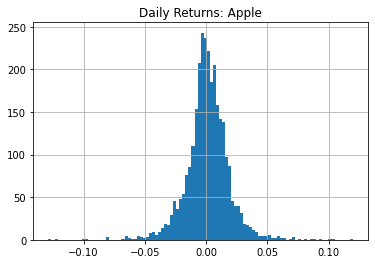

In [23]:
aapl["Daily Return"].hist(bins=100)
plt.title("Daily Returns: Apple")

Text(0.5, 1.0, 'Daily Returns: Amazon')

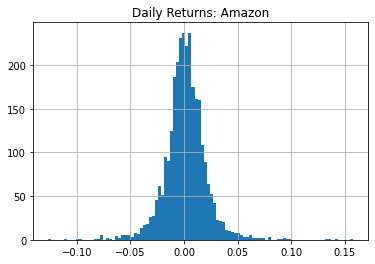

In [24]:
amzn["Daily Return"].hist(bins=100)
plt.title("Daily Returns: Amazon")

Text(0.5, 1.0, 'Daily Returns: GE')

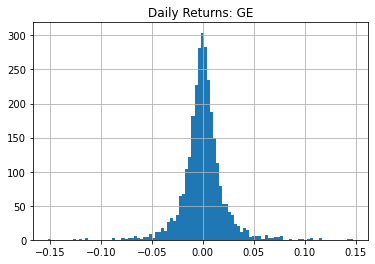

In [25]:
ge["Daily Return"].hist(bins=100)
plt.title("Daily Returns: GE")

Text(0.5, 1.0, 'Daily Returns: sp500')

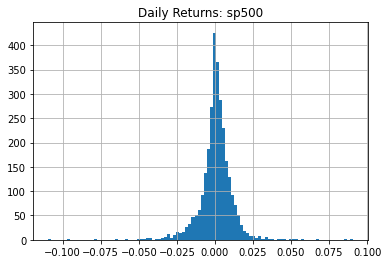

In [26]:
sp500["Daily Return"].hist(bins=100)
plt.title("Daily Returns: sp500")

# Daily Return Performance Comparison 

## Compare daily returns with benchmark.
We can use a scatter plot to compare the daily return of our stocks with the sp500.

Text(0, 0.5, 'Daily Change: SP500')

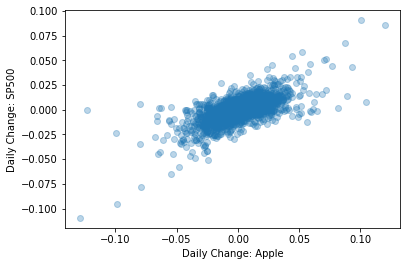

In [27]:
plt.scatter(aapl['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: Apple")
plt.ylabel("Daily Change: SP500")

Text(0, 0.5, 'Daily Change: SP500')

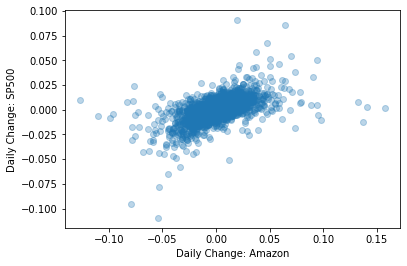

In [28]:
plt.scatter(amzn['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: Amazon")
plt.ylabel("Daily Change: SP500")

Text(0, 0.5, 'Daily Change: SP500')

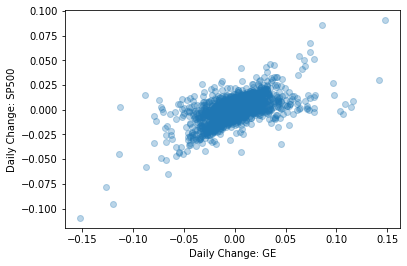

In [29]:
plt.scatter(ge['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: GE")
plt.ylabel("Daily Change: SP500")

### Cummulative Returns from Daily Returns

Using a bit of clever math, we can see that cummulative returns can be derived from daily returns:

In [30]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative_Absolute,Cumulative_Percentage,Daily Return
Date,,,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000,0.000000,NaN
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582,1.556515,0.015565
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927,1.732071,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360,0.113904,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601,-0.071201,-0.001849
...,...,...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987,2269.541849,0.030417
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993,2249.579119,-0.008425
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986,2260.102050,0.004479


In [31]:
(1 + aapl['Adj Close'].pct_change(1)).cumprod() - 1

Date
2009-12-31          NaN
2010-01-04     0.015565
2010-01-05     0.017321
2010-01-06     0.001139
2010-01-07    -0.000712
                ...    
2021-08-30    22.695418
2021-08-31    22.495791
2021-09-01    22.601020
2021-09-02    22.777436
2021-09-03    22.878025
Name: Adj Close, Length: 2940, dtype: float64

In [35]:
ser = (1 + aapl['Adj Close'].pct_change(1)).cumprod() - 1
100*ser

Date
2009-12-31            NaN
2010-01-04       1.556515
2010-01-05       1.732071
2010-01-06       0.113904
2010-01-07      -0.071201
                 ...     
2021-08-30    2269.541849
2021-08-31    2249.579119
2021-09-01    2260.102050
2021-09-02    2277.743614
2021-09-03    2287.802548
Name: Adj Close, Length: 2940, dtype: float64

----------------

**Now the questions: How can we fairly evaluate performance of an individual stock (or custom portfolio of stocks) against the performance of the "market" (typically some benchmark, like the SP500 or Russell 3000)?**

------


# Capital Asset Pricing Model
"The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks." https://www.investopedia.com/terms/c/capm.asp

Mathematically it is defined as:
$$ ER_i = R_f + \beta_i*(ER_m-R_f)$$

* $R_f$ is the risk free rate (currently 0, see next lecture notebook for details why, 
* $\beta$ is the beta of the investment, (Volatility or risk compared to the market (SP500)),
* $ER_m$ is the expected return of the market (SP500),
* $ER_i$ is the expected return of your investment


To compute $\beta$ you can fit a linear regression, where x is the market (sp500) and y is the stock of your choice (apple, amazon, ge). 
Additionally this linear regression returns $\alpha$ (the intercept) which can be interpreted as the excess return to the market.

We use **linregress(x, y)** from scipy.stats to compute the least squares regression

In [36]:
from scipy.stats import linregress

In [39]:
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

**IMPORTANT NOTE: We can't have NaN data here, make sure to drop it if you still have it in your dataframe, otherwise you will get a warning and NaN values for Alpha and Beta.**

In [51]:
aapl = aapl.dropna()
amzn = amzn.dropna()
ge = ge.dropna()
sp500 = sp500.dropna()
vix = vix.dropna()

In [52]:
beta_apple, alpha_apple, _, _, _ = linregress(sp500["Daily Return"], aapl["Daily Return"])
beta_amzn, alpha_amzn, _, _, _ = linregress(sp500["Daily Return"], amzn["Daily Return"])
beta_ge, alpha_ge, _, _, _ = linregress(sp500["Daily Return"], ge["Daily Return"])
beta_sp500, alpha_sp500, _, _, _ = linregress(sp500["Daily Return"], sp500["Daily Return"])

Both, apple and amazon have a small beta and a positive alpha which indicates excess returns

In [53]:
print(f"beta of Apple: {beta_apple}, Alpha: {alpha_apple}")

beta of Apple: 1.0917032604626988, Alpha: 0.0005698549581066899


In [54]:
print(f"beta of Amazon: {beta_amzn}, Alpha: {alpha_amzn}")

beta of Amazon: 1.0264747996224106, Alpha: 0.0006735393441121332


As you can see, GE has a higher beta and a negative alpha. This means that the risk of GE is higher compared to the market AND it yielded less returns than the sp500

In [55]:
print(f"beta of GE: {beta_ge}, Alpha: {alpha_ge}")

beta of GE: 1.1488219188566968, Alpha: -0.0004358805800206199


To verify everything, the $\beta$ of sp500 should be 1 and  $\alpha$ should be zero

In [56]:
print(f"beta of SP500: {beta_sp500}, Alpha: {alpha_sp500}")

beta of SP500: 1.0, Alpha: 0.0


To deepen our understanding: The volatility index express the volatility of the sp500 and is inverse to the market, thus it should have a negative $\beta$

In [57]:
beta_vix, alpha_vix, _, _, _ = linregress(sp500["Daily Return"], vix["Daily Return"])

In [59]:
beta_vix

-5.899407949811443

In [60]:
alpha_vix

0.006742981581293557

Additionally we can take a look at a leveraged SP500 (SSO): It should have a beta of 2

In [61]:
sp500_leveraged = pd.read_csv("sp_leveraged_2010.csv")  

In [62]:
sp500_leveraged["Daily Return"] = sp500_leveraged["Adj Close"].pct_change(1)
sp500_leveraged = sp500_leveraged.dropna()


In [63]:
beta_sp500_leveraged, alpha_sp500_leveraged, _, _, _ = linregress(sp500["Daily Return"], sp500_leveraged["Daily Return"])

In [64]:
beta_sp500_leveraged

2.010135618299088

In [65]:
alpha_sp500_leveraged # Notice how this is almost zero

-7.749523800499323e-05

**Great work! For more information on CAPM, check out: https://en.wikipedia.org/wiki/Capital_asset_pricing_model**